In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import re

compas_results_path = "./Results/CompasLime/"
cc_results_path = "./Results/CCLime/"
german_results_path = "./Results/GermanLime/"

compas_files = os.listdir(compas_results_path)
cc_files = os.listdir(cc_results_path)
german_files = os.listdir(german_results_path)

# 1 random feature
compas_file_names = [os.path.splitext(file)[0] for file in compas_files if '2' not in file]
cc_file_names = [os.path.splitext(file)[0] for file in cc_files if "2" not in file]
german_file_names = [os.path.splitext(file)[0] for file in german_files]

print(cc_file_names, len(cc_file_names))

# 2 random features
compas_file_names = [os.path.splitext(file)[0] for file in compas_files if "2" in file]
cc_file_names = [os.path.splitext(file)[0] for file in cc_files if "2" in file]

print(cc_file_names, len(cc_file_names))

c:\Users\shrey\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\shrey\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\Users\shrey\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


['CCLimeSummary_adversarial_CTGAN_explainer_CTGAN', 'CCLimeSummary_adversarial_CTGAN_explainer_DropoutVAE', 'CCLimeSummary_adversarial_CTGAN_explainer_Forest', 'CCLimeSummary_adversarial_CTGAN_explainer_Perturbation', 'CCLimeSummary_adversarial_CTGAN_explainer_RBF', 'CCLimeSummary_adversarial_DropoutVAE_explainer_CTGAN', 'CCLimeSummary_adversarial_DropoutVAE_explainer_DropoutVAE', 'CCLimeSummary_adversarial_DropoutVAE_explainer_Forest', 'CCLimeSummary_adversarial_DropoutVAE_explainer_Perturbation', 'CCLimeSummary_adversarial_DropoutVAE_explainer_RBF', 'CCLimeSummary_adversarial_Forest_explainer_CTGAN', 'CCLimeSummary_adversarial_Forest_explainer_DropoutVAE', 'CCLimeSummary_adversarial_Forest_explainer_Forest', 'CCLimeSummary_adversarial_Forest_explainer_Perturbation', 'CCLimeSummary_adversarial_Forest_explainer_RBF', 'CCLimeSummary_adversarial_Perturbation_explainer_CTGAN', 'CCLimeSummary_adversarial_Perturbation_explainer_DropoutVAE', 'CCLimeSummary_adversarial_Perturbation_explainer_

In [2]:


# pattern = r"\('(.*?)', (.*?)\)"

# important_feature_list = []

# heat_map_data = {}

# for file in cc_files:
#     file_name = os.path.splitext(file)[0]
#     parts = file_name.split("_")
#     adversarial = parts[2]  # Rows represent the generators used for explanations
#     explainer = parts[4]  # Columns represent the generators used to train the adversarial model.

#     with open(cc_results_path + file, "r") as f:
#         rank_1_features = f.readline()
#         # print(rank_1_features)

#         imp_feat = re.findall(pattern, rank_1_features)
#         # important_feature_list.append(matches)

#     race_score = 0
#     for feature in imp_feat:
#         # if feature[0] == "race":
#         if feature[0] == "racePctWhite numeric":
#             # print(float(feature[1]))
#             race_score = float(feature[1])
#             break

#     heat_map_data[(adversarial, explainer)] = race_score

# heat_map_data

In [3]:
import os
import re

def extract_heat_map_data():
    """
    Extracts the heatmap data from compas_files in the given results path.
    """

    compas_files = os.listdir(compas_results_path)
    # if two_random_feature:
    #     compas_files = [file for file in compas_files if "2" in file]
    # else:
    #     compas_files = [file for file in compas_files if "2" not in file]

    # Initialize the list to hold the important features and the heatmap data dictionary
    # important_feature_list = []
    heat_map_data = {}
    # Regular expression pattern to find the features and their scores
    pattern = r"\('(.*?)', (.*?)\)"
    # Iterate over each file to extract the data
    for file in compas_files:
        file_name = os.path.splitext(file)[0]
        parts = file_name.split("_")
        # Columns represent the generators used to train the adversarial model.
        if "2" in file:
            adversarial = "Compas2/" + parts[2]
        else:
            adversarial = "Compas/" + parts[2]  
        explainer = parts[4]    # Rows represent the generators used for explanations   
        with open(os.path.join(compas_results_path, file), "r") as f:
            rank_1_features = f.readline()  
            imp_feat = re.findall(pattern, rank_1_features) 

        race_score = 0
        for feature in imp_feat:
            if feature[0] == "race":
                race_score = float(feature[1])
                break   
        heat_map_data[(adversarial, explainer)] = race_score    

    cc_files = os.listdir(cc_results_path)

    # Iterate over each file to extract the data
    for file in cc_files:
        file_name = os.path.splitext(file)[0]
        parts = file_name.split("_")
        # Columns represent the generators used to train the adversarial model.
        if "2" in file:
            adversarial = "CC2/" + parts[2]
        else:
            adversarial = "CC/" + parts[2]
        explainer = parts[4]    # Rows represent the generators used for explanations
        with open(os.path.join(cc_results_path, file), "r") as f:
            rank_1_features = f.readline()
            imp_feat = re.findall(pattern, rank_1_features)

        race_score = 0
        for feature in imp_feat:
            if feature[0] == "racePctWhite numeric":
                race_score = float(feature[1])
                break

        heat_map_data[(adversarial, explainer)] = race_score

    german_files = os.listdir(german_results_path)

    # Iterate over each file to extract the data
    for file in german_files:
        file_name = os.path.splitext(file)[0]
        parts = file_name.split("_")
        # Columns represent the generators used to train the adversarial model.
        adversarial = "German/" + parts[2]
        explainer = parts[4]  # Rows represent the generators used for explanations
        with open(os.path.join(german_results_path, file), "r") as f:
            rank_1_features = f.readline()
            imp_feat = re.findall(pattern, rank_1_features)

        race_score = 0
        for feature in imp_feat:
            if feature[0] == "Gender":
                race_score = float(feature[1])
                break

        heat_map_data[(adversarial, explainer)] = race_score

    return heat_map_data

In [4]:
heat_map_data = extract_heat_map_data()
heat_map_data

{('Compas2/CTGAN', 'CTGAN'): 0.9061488673139159,
 ('Compas2/CTGAN', 'DropoutVAE'): 0.49029126213592233,
 ('Compas2/CTGAN', 'Forest'): 1.0,
 ('Compas2/CTGAN', 'Perturbation'): 0.9967637540453075,
 ('Compas2/CTGAN', 'RBF'): 1.0,
 ('Compas2/DropoutVAE', 'CTGAN'): 1.0,
 ('Compas2/DropoutVAE', 'DropoutVAE'): 0.5906148867313916,
 ('Compas2/DropoutVAE', 'Forest'): 1.0,
 ('Compas2/DropoutVAE', 'Perturbation'): 0.9967637540453075,
 ('Compas2/DropoutVAE', 'RBF'): 1.0,
 ('Compas2/Forest', 'CTGAN'): 0.9983818770226537,
 ('Compas2/Forest', 'DropoutVAE'): 0.255663430420712,
 ('Compas2/Forest', 'Forest'): 1.0,
 ('Compas2/Forest', 'Perturbation'): 0.9967637540453075,
 ('Compas2/Forest', 'RBF'): 1.0,
 ('Compas2/Perturbation', 'CTGAN'): 1.0,
 ('Compas2/Perturbation', 'DropoutVAE'): 0.6601941747572816,
 ('Compas2/Perturbation', 'Forest'): 1.0,
 ('Compas2/Perturbation', 'Perturbation'): 0.15210355987055016,
 ('Compas2/Perturbation', 'RBF'): 1.0,
 ('Compas2/RBF', 'CTGAN'): 1.0,
 ('Compas2/RBF', 'DropoutVAE

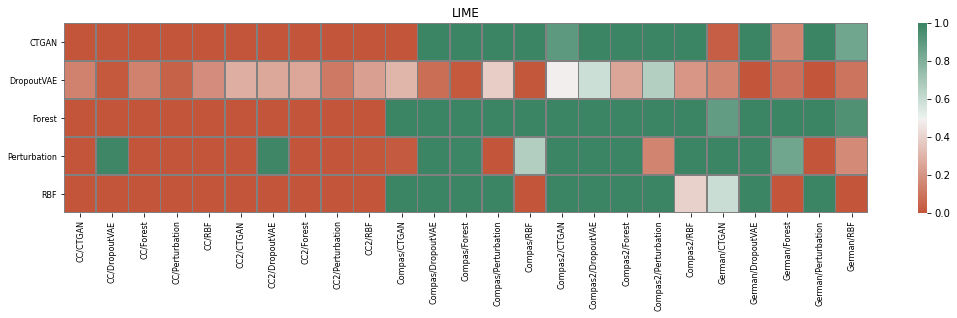

In [5]:
rows = sorted(set(key[1] for key in heat_map_data.keys()))
columns = sorted(set(key[0] for key in heat_map_data.keys()))

# Create a matrix to store the values
matrix = [ [heat_map_data.get((col, row), 0) for col in columns] for row in rows]

# colors = ["red", "white", "green"]
cmap = sns.diverging_palette(20, 150, as_cmap=True)
# cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

plt.figure(figsize=(18, 3.5))

# Create heatmap
sns.heatmap(
    matrix,
    # annot=True,
    # fmt=".2f",
    linewidths=0.5,
    linecolor='grey',
    cmap=cmap,
    vmin=1,
    vmax=0,
    xticklabels=columns,
    yticklabels=rows,
    # cbar_kws={"label": "Value"},
)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title("LIME")
plt.show()

In [6]:
rows = sorted(set(key[1] for key in heat_map_data_one_feature.keys()))
columns = sorted(set(key[0] for key in heat_map_data_one_feature.keys()))

# Create a matrix to store the values
matrix = [[heat_map_data_one_feature.get((col, row), 0) for col in columns] for row in rows]

colors = ["red", "white", "green"]
cmap = sns.diverging_palette(20, 150, as_cmap=True)

# Create heatmap
sns.heatmap(
    matrix,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    vmin=1,
    vmax=0,
    xticklabels=columns,
    yticklabels=rows,
    # cbar_kws={"label": "Value"},
)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Heatmap")
plt.show()

NameError: name 'heat_map_data_one_feature' is not defined

In [ ]:
# 4. Reduce to 2-D

In [ ]:
pd.read_csv('./Data/compas_RBF_train.csv')

,age,two_year_recid,c_charge_degree,sex,priors_count,length_of_stay,race,unrelated_column_one,unrelated_column_two,response
0,37,1,M,Male,4,2,0,0,0,1
1,28,0,F,Male,0,1,0,1,0,1
2,22,0,M,Female,0,1,0,0,1,0
3,45,0,F,Female,1,1,0,1,0,1
4,28,1,F,Male,18,12,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
5549,34,1,F,Male,19,4,1,0,1,0
5550,33,1,F,Female,7,26,1,0,0,0
5551,59,1,F,Male,10,127,1,0,1,1
5552,44,1,F,Female,0,0,0,0,0,1


In [ ]:
adv_rbf_train = pd.read_csv("./Data/compas_adversarial_train_RBF.csv")
adv_rbf_train.head()

,age,two_year_recid,c_charge_degree,sex,priors_count,length_of_stay,race,unrelated_column_one,unrelated_column_two
0,32,1,F,Male,13,281,1,0,0
1,27,0,F,Female,18,174,1,0,1
2,46,0,F,Male,2,85,1,1,1
3,30,0,F,Male,0,113,0,1,0
4,37,1,F,Male,2,74,1,0,0


In [ ]:
adv_rbf_train = pd.read_csv("./Data/compas_RBF_train.csv")
adv_rbf_train.head()

,age,two_year_recid,c_charge_degree,sex,priors_count,length_of_stay,race,unrelated_column_one,unrelated_column_two,response
0,37,1,M,Male,4,2,0,0,0,1
1,28,0,F,Male,0,1,0,1,0,1
2,22,0,M,Female,0,1,0,0,1,0
3,45,0,F,Female,1,1,0,1,0,1
4,28,1,F,Male,18,12,1,1,0,0
